<a href="https://colab.research.google.com/github/geniuschinchillas/ChinchillasSnack/blob/master/Supervised%20Learning/Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from sklearn.datasets import samples_generator as sg

In [0]:
%matplotlib inline

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
import mglearn

**Linear Models**

Linear models for regression

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
from sklearn.datasets.samples_generator import make_regression

In [0]:
X, y, coef = make_regression(n_samples=60, n_features=1, n_informative=1, 
                            noise=10, coef=True, random_state=0)

In [10]:
print(X.shape)
print(coef)

(60, 1)
29.614019752214492


In [11]:
print(y)

[ 13.96420455   3.23554172 -18.58442304  42.49774253  29.84594154
   0.69334246 -56.58651801  20.06023862 -10.95037945 -40.22135965
  18.52370062  47.66156114 -11.2760963  -27.87425514  -6.71565213
  -7.67079125  48.70440245  61.50390984  -1.45013971 -11.02944183
  66.51098598  11.14407485 -23.73067717  14.15407657   4.44278877
  34.61134638 -41.51899017 -21.73900887   7.41492379 -47.80245657
 -21.95630211  30.09349139   8.65283141   9.77154116   6.07658361
 -41.74827997  -2.21321423 -21.37190545   3.56961894  14.02909127
  65.0340129   37.65539089   8.3474392   -9.59368526 -37.02801674
 -34.34106968   2.6559067   22.23414768  11.09662376  20.93332858
  54.4669501   35.624909   -17.88751974   2.20149974 -57.16737553
 -33.46260412  47.95114903 -16.55491754  45.00041122 -18.20688346]


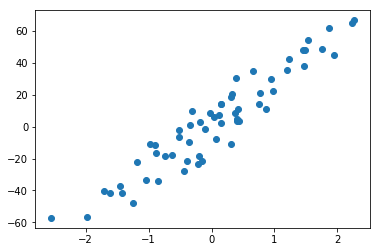

In [12]:
plt.scatter(X, y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [14]:
print(X_train.shape)
print(y_train.shape)

(45, 1)
(45,)


In [0]:
lr = LinearRegression().fit(X_train, y_train)

In [16]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [27.834947]
lr.intercept_: -0.4937913942790093


In [17]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.92
Test set score: 0.81


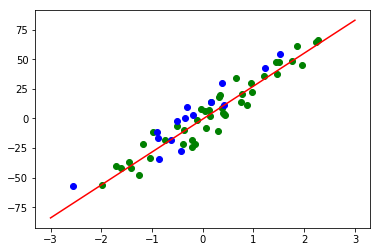

In [18]:
plt.scatter(X_train, y_train, c='g')
plt.scatter(X_test, y_test, c='b')
#plt.scatter(X_test, lr.predict(X_test), c='r')
line = np.linspace(-3, 3, 1000).reshape(-1,1)
plt.plot(line, lr.predict(line), c='r')

In [0]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

In [0]:
boston = load_boston()
X = boston.data

X = MinMaxScaler().fit_transform(boston.data)
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
y = boston.target

In [21]:
print(X.shape)
print(y.shape)

(506, 104)
(506,)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [0]:
lr = LinearRegression().fit(X_train, y_train)

In [24]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


Ridge regression

In [0]:
from sklearn.linear_model import Ridge

In [26]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [27]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [28]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


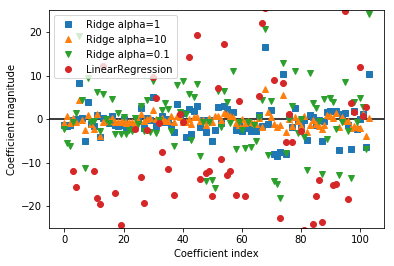

In [29]:
plt.plot(ridge.coef_, 's',label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

Lasso

In [0]:
from sklearn.linear_model import Lasso

In [31]:
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


Training set score: 0.90
Test set score: 0.77
Number of features used: 33 

Training set score: 0.94
Test set score: 0.74
Number of features used: 67 

Training set score: 0.95
Test set score: 0.64
Number of features used: 96 



Text(0, 0.5, 'Coefficient magnitude')

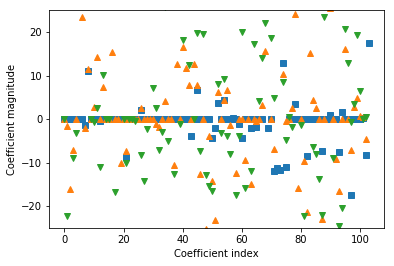

In [32]:
alphas = [0.01, 0.001, 0.0001]
symbols = ['s', '^', 'v']
for alpha, symbol in zip(alphas, symbols):
    lasso = Lasso(alpha = alpha, max_iter=100000).fit(X_train, y_train)
    print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
    print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
    print("Number of features used:", np.sum(lasso.coef_ != 0), '\n')
    
    plt.plot(lasso.coef_, symbol)
    
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Linear models for classification

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [0]:
from sklearn.datasets.samples_generator import make_blobs

(30, 2)


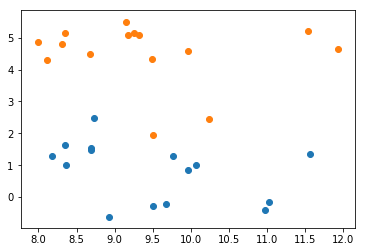

In [35]:
X, y = make_blobs(n_samples=30, centers=2, random_state=4)
print(X.shape)
blues = y == 0
reds = y == 1
plt.scatter(X[blues,0], X[blues, 1])
plt.scatter(X[reds,0], X[reds, 1])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


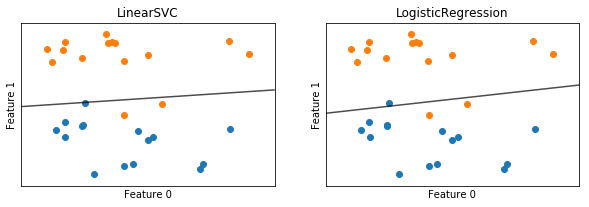

In [38]:
fig, axes = plt.subplots(1,2,figsize=(10,3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
  clf = model.fit(X, y)
  
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                 ax=ax, alpha=0.7)
  
  ax.scatter(X[blues,0], X[blues,1])
  ax.scatter(X[reds,0],X[reds,1])
  ax.set_title(clf.__class__.__name__)
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")

In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                   stratify=cancer.target, random_state=42)

Training set score: 0.958
Test set score: 0.958 

Training set score: 0.981
Test set score: 0.965 

Training set score: 0.967
Test set score: 0.965 



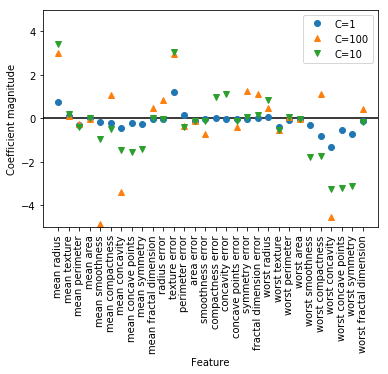

In [41]:
chs = [1,100,10,0.01]
symbols = ['o', '^', 'v']
for ch, symbols in zip(chs, symbols):
    label = "C=" + str(ch)
    logreg = LogisticRegression(solver='lbfgs', max_iter=100000, C=ch).fit(X_train, y_train)
    print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
    print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)), '\n')
    
    plt.plot(logreg.coef_.T, symbols, label=label)

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Linear models for multiclass classification

In [0]:
from sklearn.datasets import make_blobs

(100, 2)     (100,)
[2 1 0 1 2 1 0 1 1 0 0 2 2 0 0 2 2 0 2 2 0 2 2 0 0 0 1 2 2 2 2 1 1 2 0 0 0
 0 1 1 2 0 1 0 0 1 2 2 2 1 1 1 0 2 2 2 0 0 1 0 2 1 2 1 2 2 1 2 1 1 1 2 2 0
 1 2 1 2 1 1 0 1 0 2 0 0 0 1 0 1 1 1 0 1 0 0 0 1 2 0]


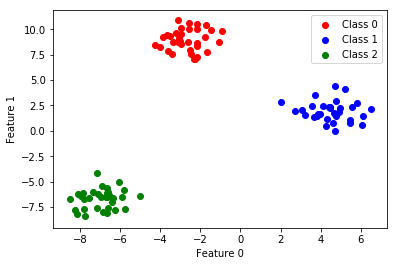

In [43]:
X, y = make_blobs(random_state=42)
print(X.shape,'   ',y.shape)
print(y)
c1 = y == 0
c2 = y == 1
c3 = y == 2
plt.scatter(X[c1,0], X[c1,1], c='r')
plt.scatter(X[c2,0], X[c2,1], c='b')
plt.scatter(X[c3,0], X[c3,1], c='g')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [44]:
linear_svm = LinearSVC().fit(X,y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


In [47]:
print(linear_svm.coef_)
print(linear_svm.intercept_)

[[-0.17492454  0.23140255]
 [ 0.47621553 -0.06936502]
 [-0.18913997 -0.20399946]]
[-1.07745806  0.13140899 -0.08604779]


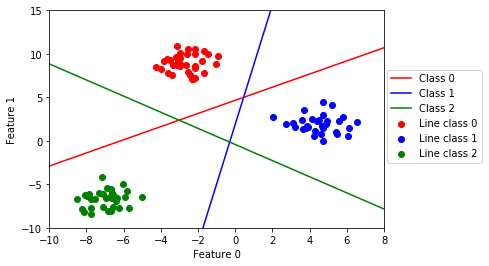

In [54]:
plt.scatter(X[c1,0], X[c1,1], c='r')
plt.scatter(X[c2,0], X[c2,1], c='b')
plt.scatter(X[c3,0], X[c3,1], c='g')

line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['r','b','g']):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

```
y = a*x - b
a = -W[0]/W[1]
b = I[0]/W[1]
```

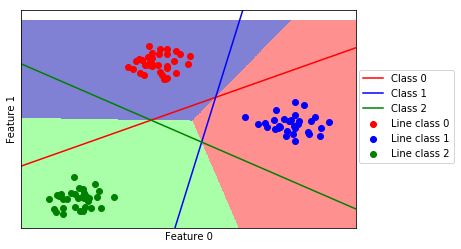

In [55]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.5)
plt.scatter(X[c1,0], X[c1,1], c='r')
plt.scatter(X[c2,0], X[c2,1], c='b')
plt.scatter(X[c3,0], X[c3,1], c='g')

line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['r','b','g']):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))